### Problem 1
Suppose the FNN $f(x)$ has 2 hidden layers with 2 neurons in each layer. The activation functions in all the hidden layers are $tanh(x)$. The parameters are given as follows:
$$
W^{(1)}=
\begin{pmatrix}
1 \\
1 
\end{pmatrix}
,
b^{(1)}=
\begin{pmatrix}
-1 \\
0
\end{pmatrix}
$$
$$
W^{(2)}=
\begin{pmatrix}
1 & -1 \\
1 & 2 
\end{pmatrix}
,
b^{(2)}=
\begin{pmatrix}
0 \\
0
\end{pmatrix}
$$
$$
W^{(3)}=
\begin{pmatrix}
2 & 1
\end{pmatrix}
,
b^{(3)}=
\begin{pmatrix}
0
\end{pmatrix}
$$

1. Write down the explicit expression of this FNN.
2. Plot this FNN using matplotlib.
3. Compute $f(1)$.

### 1.
For the FNN f(x) with 2 hidden layers, 2 neurons in each layer and activation function $\sigma = \tanh$,

Input layer:
\begin{align*}
    z^{(1)} &= x 
\end{align*}
Hidden layer 1:
\begin{align*}
    z^{(2)} &= \sigma \left(W^{(1)} z^{(1)} + b^{(1)}\right) \\
            &= \sigma \left(W^{(1)} x + b^{(1)} \right) \\
            &= \tanh \left(
            \begin{pmatrix} 
            1 \\ 
            1 
            \end{pmatrix} x + 
            \begin{pmatrix}
            -1 \\ 
            0 
            \end{pmatrix}
            \right) \\
            &= \begin{pmatrix} 
            \tanh(x - 1) \\ 
            \tanh(x) 
            \end{pmatrix} 
\end{align*}
Hidden layer 2:
\begin{align*}
    z^{(3)} &= \sigma \left(W^{(2)} z^{(2)} + b^{(2)} \right) \\
            &= \sigma \left(W^{(2)} \left(\sigma \left(W^{(1)} x + b^{(1)} \right) \right) + b^{(2)} \right) \\
            &= \tanh \left(
            \begin{pmatrix} 
            1 & -1 \\ 
            1 & 2
            \end{pmatrix}
            \begin{pmatrix} 
            \tanh(x - 1) \\ 
            \tanh(x) 
            \end{pmatrix} + 
            \begin{pmatrix}
            0 \\ 
            0 
            \end{pmatrix}
            \right) \\
            &= \tanh \left(
            \begin{pmatrix} 
            \tanh(x - 1) - \tanh(x)\\ 
            \tanh(x - 1) + 2 \tanh(x)
            \end{pmatrix} 
            \right) \\
            &= \begin{pmatrix} 
            \tanh \left(\tanh(x - 1) - \tanh(x) \right)\\ 
            \tanh \left(\tanh(x - 1) + 2 \tanh(x) \right)
            \end{pmatrix}
\end{align*}
 Output layer:
\begin{align*}
          y &= W^{(3)} z^{(3)} + b^{(3)} \\
            &= W^{(3)} \left(\sigma \left(W^{(2)} \left(\sigma \left(W^{(1)} x + b^{(1)} \right) \right) + b^{(2)} \right) \right) + b^{(3)} \\
            &= \begin{pmatrix} 
            2 & 1
            \end{pmatrix}
            \begin{pmatrix} 
            \tanh \left(\tanh(x - 1) - \tanh(x) \right)\\ 
            \tanh \left(\tanh(x - 1) + 2 \tanh(x) \right)
            \end{pmatrix} + (0) \\
            &= 2 \tanh \left(\tanh(x - 1) - \tanh(x) \right) + \tanh \left(\tanh(x - 1) + 2 \tanh(x) \right)
\end{align*}

### 2.

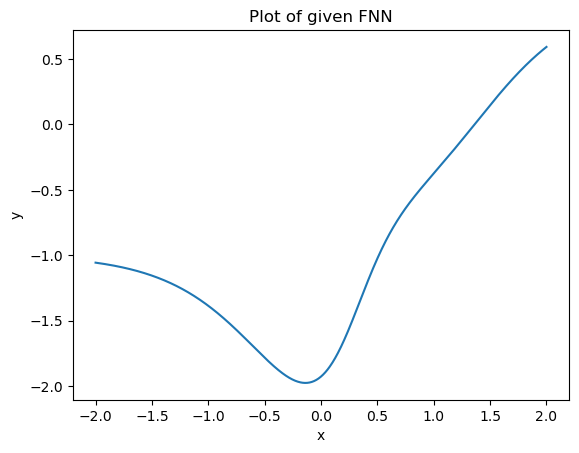

In [74]:
## 2. Plot feedforward neural network with 2 hidden layers

import matplotlib.pyplot as plt
import numpy as np
import torch
import time

N = 1000
W1 = torch.tensor([[1.], [1.]])
b1 = torch.tensor([[-1.], [0.]])

W2 = torch.tensor([[1., -1.], [1., 2.]])
b2 = torch.tensor([[0.], [0.]])

W3 = torch.tensor([2., 1.])
b3 = torch.tensor([0.])

def f(x):
        # input layer
        z1 = x
        
        # hidden layer 1
        z2 = torch.tanh(torch.mul(W1, z1) + b1)

        # hidden layer 2      
        z3 = torch.tanh(torch.matmul(W2, z2) + b2)
        
        # output layer
        y = torch.matmul(W3, z3) + b3
        
        return y

x = torch.linspace(-2, 2, N)

# plot
plt.figure()
plt.plot(x, f(x), '-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of given FNN')
plt.show()    

### 3.

f(1) =  [-0.37477827]


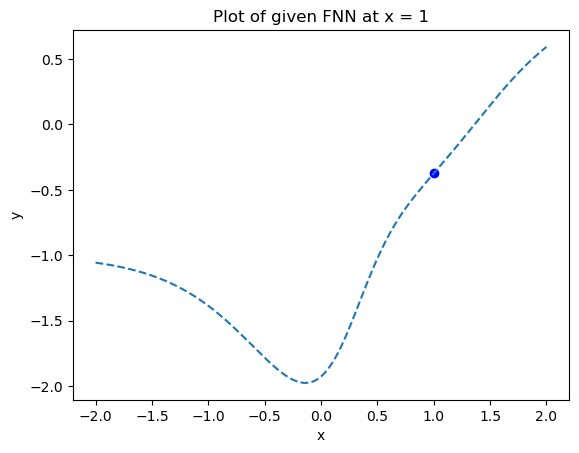

In [85]:
## f(1)

x = torch.tensor([1.])
X = torch.linspace(-2, 2, N)

print('f(1) = ', np.array(f(x)))
plt.figure()
plt.plot(x, f(x), 'bo')
plt.plot(X, f(X), '--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of given FNN at x = 1')
plt.show()    

### Problem 2

For the FNN with $d_{in}=d_{out}=1$ and $L$ hidden layers with $H$ neurons in each layers. Count the total number of parameters in this FNN.

- Hint 1: the total number of parameters in the FNN refers to the total number of scalar numbers in all the weights and bias. For example, the total number of parameters in the FNN in Problem 1 is 2 + 2 + 4 + 2 + 2 + 1 = 13.

- Hint 2: There is no need to use Python code in this problem.

#### Answer: 
##. Reference: https://learn.flucoma.org/learn/mlp-parameters/

Total number of parameters = Total number of weights + Total number of biases

Total number of weights = sum of the products of each pair of adjacent layers.

Total number of biases = number of hidden neurons + number of output neurons.

$d_{in}=d_{out}=1$ implies that we have one input and output layers.

Also, there are $L$ hidden layers with $H$ neurons in each layers.

For this FNN with 1 input neuron, $L$ hidden layers of $H$ neurons, and an output layer of 1 neuron, 

Total number of weights $= (1 \times H) + (H \times H)(L - 1) + (H \times 1) = H + H^2(L - 1) + H = 2H + H^2(L - 1) $.

Total number of biases $= H * L + 1 = HL + 1 $.

$\therefore$ Total number of parameters $ = 2H + H^2(L - 1) + HL + 1 $

$$ = (L - 1)H^2  + (2 + L)H + 1. $$

Note: Applying this to the FNN in problem 1,

$d_{in}=d_{out}=1$, $L$ = 2, $H$ = 2 for each L,

Total number of weights $= (1 \times 2) + (2 \times 2) + (2 \times 1) = 8 $.

Total number of biases $= 2 + 2 + 1 = 5 $.

So,

Total number of parameters $ = 8 + 5 = 13 $.

### Problem 3

Run the code for FNN with 2 hidden layers and make the following change:

1. Change the learning rate to 1, 0.1, 0.01, 0.001, 0.0001 and see which one results in the smaller MSE.

2. Change the mean squared loss to L1Loss function in https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html and compare with the MSE loss.

3. Change the total number of iterations in optimization algorithm to 1e5, 1e6, 1e7 and see if the MSE will decrease further.

### 1.

Learning rate = 1; epoch: 0; MSE: 4.58e-01; elapsed time: 0.00 sec
Learning rate = 1; epoch: 1000; MSE: nan; elapsed time: 0.81 sec
Learning rate = 1; epoch: 2000; MSE: nan; elapsed time: 1.72 sec
Learning rate = 1; epoch: 3000; MSE: nan; elapsed time: 2.37 sec
Learning rate = 1; epoch: 4000; MSE: nan; elapsed time: 2.89 sec
Learning rate = 1; epoch: 5000; MSE: nan; elapsed time: 3.45 sec
Learning rate = 1; epoch: 6000; MSE: nan; elapsed time: 3.93 sec
Learning rate = 1; epoch: 7000; MSE: nan; elapsed time: 4.47 sec
Learning rate = 1; epoch: 8000; MSE: nan; elapsed time: 5.01 sec
Learning rate = 1; epoch: 9000; MSE: nan; elapsed time: 5.53 sec


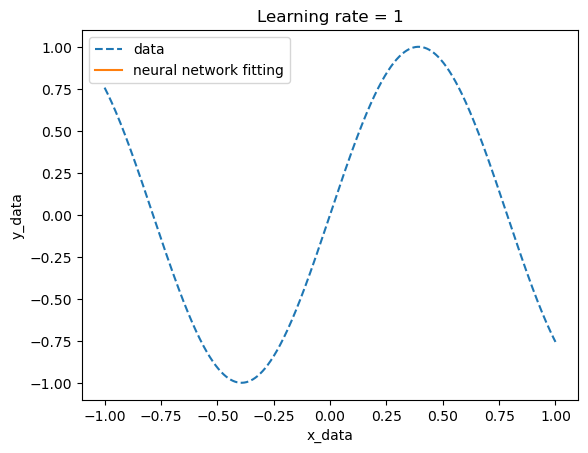

In [95]:
## Change in learning rates 

N = 1000
x_data = torch.linspace(-1, 1, N)
x_data = torch.reshape(x_data, (N, 1))
y_data = torch.sin(4*x_data)

class FNNTwoHiddenLayer(torch.nn.Module):
    
    def __init__(self):
        super(FNNTwoHiddenLayer, self).__init__()    
        
        self.hidden_layer1 = torch.nn.Linear(1, 10)
        self.hidden_layer2 = torch.nn.Linear(10, 10)
        self.output_layer  = torch.nn.Linear(10, 1)
                    
    def forward(self, x):
        
        # input layer
        z = x
        
        # hidden layer 1
        z = self.hidden_layer1(z)
        z = torch.tanh(z)

        # hidden layer 2      
        z = self.hidden_layer2(z)
        z = torch.tanh(z)
        
        # output layer
        z = self.output_layer(z)
        
        return z


# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient descent
# lr: learning rate
optimizer = torch.optim.SGD(fnn2.parameters(), lr=1)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        print("Learning rate = 1; epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
        
plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Learning rate = 1')
plt.show()

For learning rate = 0.1 , minimum MSE is  0.00018637199536897242


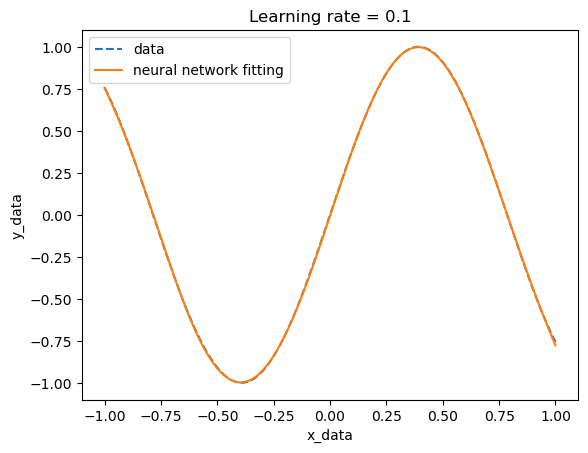

In [96]:
# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.1)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        MSE = np.array(loss.item())
print("For learning rate = 0.1 , minimum MSE is ", np.min(MSE))

plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Learning rate = 0.1')
plt.show()

For learning rate = 0.01 , minimum MSE is  0.0011812810553237796


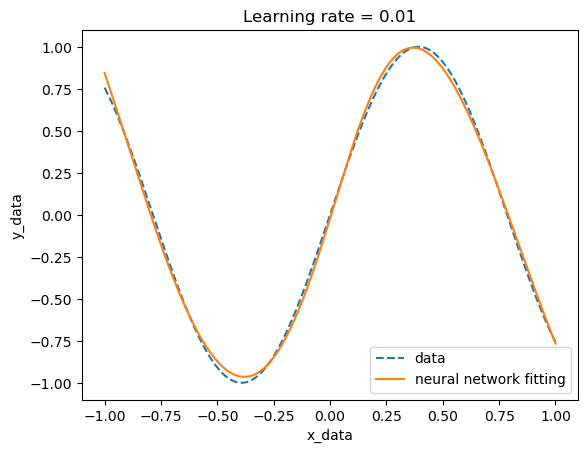

In [97]:
# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.01)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        MSE = np.array(loss.item())
print("For learning rate = 0.01 , minimum MSE is ", np.min(MSE))

plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Learning rate = 0.01')
plt.show()

For learning rate = 0.001 , minimum MSE is  0.380513072013855


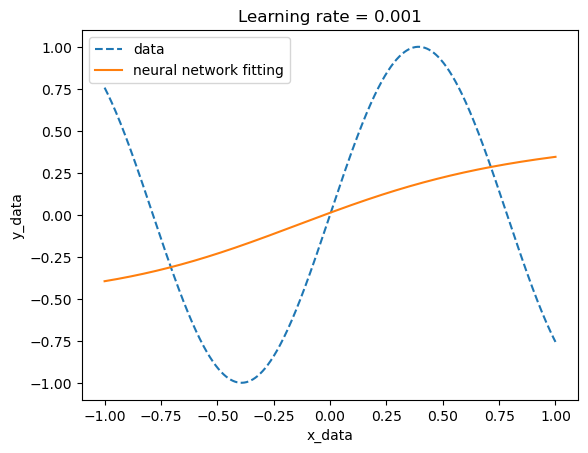

In [99]:
# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.001)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        MSE = np.array(loss.item())
print("For learning rate = 0.001 , minimum MSE is ", np.min(MSE))

plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Learning rate = 0.001')
plt.show()

For learning rate = 0.0001 , minimum MSE is  0.42080363631248474


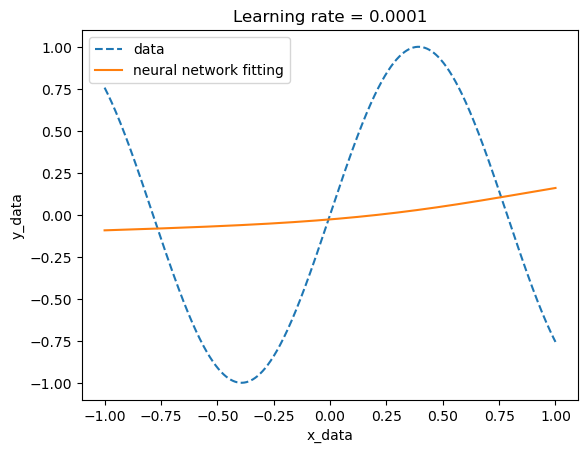

In [100]:
# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.0001)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        MSE = np.array(loss.item())
print("For learning rate = 0.0001 , minimum MSE is ", np.min(MSE))

plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Learning rate = 0.0001')
plt.show()

### Learning rate = 0.1 seems to give the lowest MSEs. Did I do something wrong? I compared my work with someone else's and that person's best learning rate was 0.001.

## 2.

epoch: 0; MAE: 5.93e-01; elapsed time: 0.00 sec
epoch: 1000; MAE: 1.19e-01; elapsed time: 0.53 sec
epoch: 2000; MAE: 1.35e-01; elapsed time: 1.06 sec
epoch: 3000; MAE: 1.12e-01; elapsed time: 1.73 sec
epoch: 4000; MAE: 1.24e-01; elapsed time: 2.27 sec
epoch: 5000; MAE: 1.25e-01; elapsed time: 2.77 sec
epoch: 6000; MAE: 1.32e-01; elapsed time: 3.30 sec
epoch: 7000; MAE: 1.28e-01; elapsed time: 3.88 sec
epoch: 8000; MAE: 1.19e-01; elapsed time: 4.47 sec
epoch: 9000; MAE: 1.19e-01; elapsed time: 5.05 sec


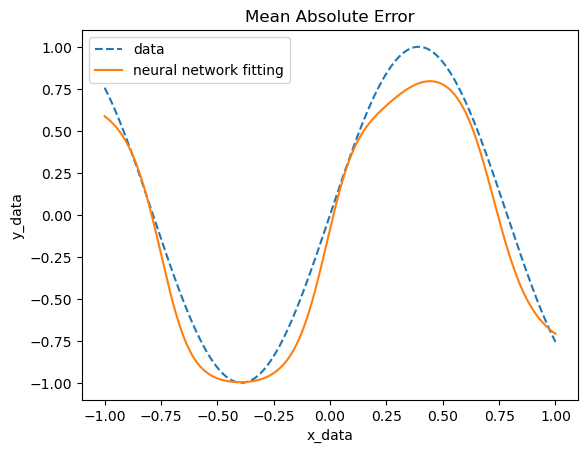

epoch: 0; MSE: 1.83e-02; elapsed time: 5.69 sec
epoch: 1000; MSE: 1.19e-03; elapsed time: 6.47 sec
epoch: 2000; MSE: 5.59e-04; elapsed time: 7.22 sec
epoch: 3000; MSE: 3.92e-04; elapsed time: 7.86 sec
epoch: 4000; MSE: 3.24e-04; elapsed time: 8.43 sec
epoch: 5000; MSE: 2.86e-04; elapsed time: 8.98 sec
epoch: 6000; MSE: 2.59e-04; elapsed time: 9.51 sec
epoch: 7000; MSE: 2.36e-04; elapsed time: 10.06 sec
epoch: 8000; MSE: 2.16e-04; elapsed time: 10.59 sec
epoch: 9000; MSE: 1.99e-04; elapsed time: 11.14 sec


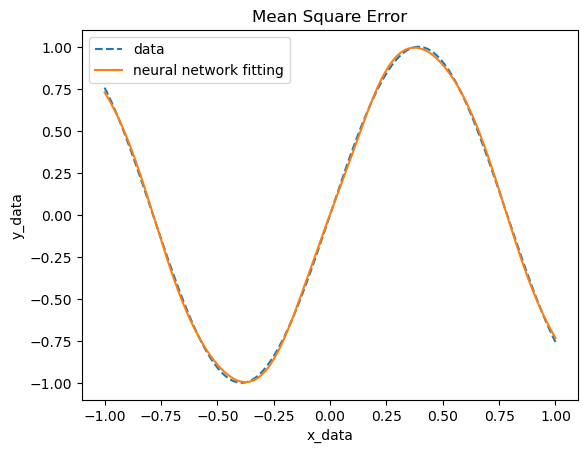

In [102]:
# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MAELoss: mean absolute loss
criterion1 = torch.nn.L1Loss()
criterion2 = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.1)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion1(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        print("epoch: %d; MAE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
        
plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Mean Absolute Error')
plt.show()


for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion2(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))

plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Mean Square Error')
plt.show()

### The mean absolute errors are mostly greater than the mean square errors for learning rate 0.1 and the MSE figure also shows a better fit. Using the MSE loss function proves to be better.

### 3.

For total epoch = 1e5, minimum MSE is  1.3687681530427653e-05


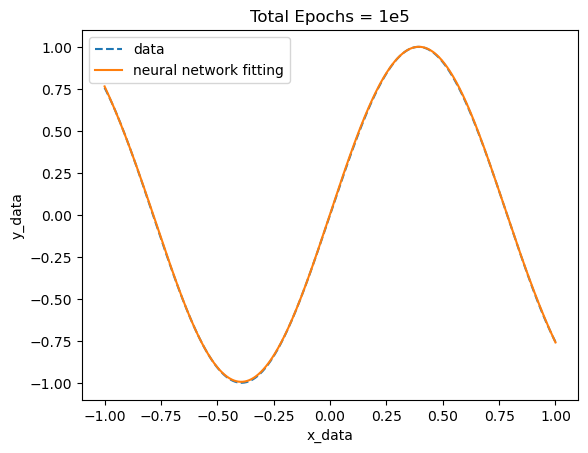

In [103]:
## Change in number of iterations

# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.1)

# epoch: number of iterations in optimization algorithm
total_epoch = 100000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        MSE = np.array(loss.item())
print("For total epoch = 1e5, minimum MSE is ", np.min(MSE))

plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Total Epochs = 1e5')
plt.show()

For total epoch = 1e6, minimum MSE is  1.5260993677657098e-06


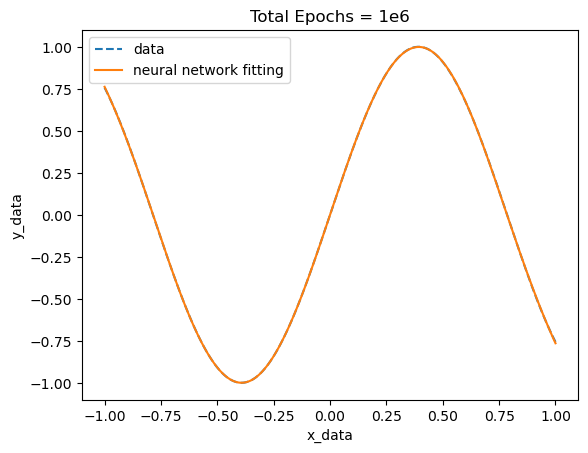

In [104]:
# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.1)

# epoch: number of iterations in optimization algorithm
total_epoch = 1000000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        MSE = np.array(loss.item())
print("For total epoch = 1e6, minimum MSE is ", np.min(MSE))

plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Total Epochs = 1e6')
plt.show()

For total epoch = 1e7, minimum MSE is  1.354814145315686e-07


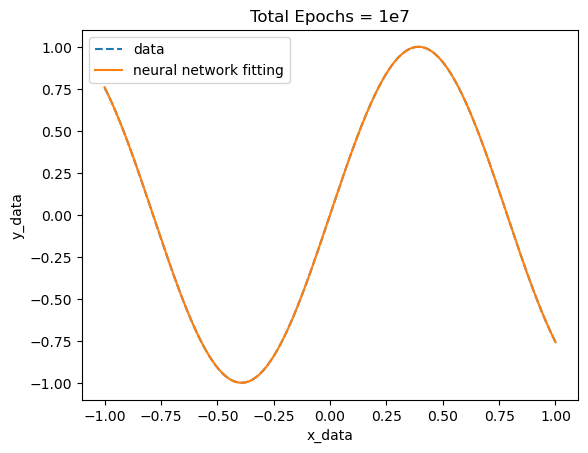

In [105]:
# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.1)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        MSE = np.array(loss.item())
print("For total epoch = 1e7, minimum MSE is ", np.min(MSE))

plt.figure()
plt.plot(x_data, y_data, '--', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Total Epochs = 1e7')
plt.show()

### Yes, the MSE decreases further with increase in the number of total epochs. The figures also show that the fits get better as the total epoch number increases.

***

1. How difficult do you think of the homework? Please give your marks between 1-5 (1 is the easiest and 5 is the most difficult).

    Ans: It varies. Some homeworks are 3, some 4, mid-term project 5.

2. How difficult do you think of the lecture? Please give your marks between 1-5 (1 is the easiest and 5 is the most difficult).

    Ans: 3. I think the lectures are fine the way they are.
